Implement a feed forward neural network with three hidden layers for the CIFAR-10 dataset.Train the network using a baseline optimization algorithm, such as stochastic gradient descent (SGD) or Adam, without any specific weight initialization technique or regularization technique. Record the accuracy and loss during training.

(a) Repeat the training process with Xavier initialization for weight initialization. Compare the convergence speed and accuracy of the network with the baseline results. Analyze the impact of Xavier initialization on the network's performance.

(b) Repeat the training process with Kaiming initialization for weight initialization. Compare the convergence speed and accuracy of the network with the baseline results. Analyze the impact of Kaiming initialization on the network's performance.

(c) Implement dropout regularization by applying dropout to the hidden layers of the network. Train the network with dropout regularization and compare its performance with the baseline results. Analyze the impact of dropout on the network's performance in terms of accuracy and overfitting

(d) Implement L1 or L2 regularization techniques by adding a regularization term to the loss function during training. Train the network with regularization and compare its performance with the baseline results. Analyze the impact of regularization on the network's performance in terms of accuracy and prevention of overfitting.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.initializers import glorot_normal, he_normal
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from time import time

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [3]:
def create_model(initializer=None, dropout_rate=None, l2_regularizer=None):
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(128, activation='relu', kernel_initializer=initializer, kernel_regularizer=l2_regularizer),
        Dense(64, activation='relu', kernel_initializer=initializer, kernel_regularizer=l2_regularizer),
        Dense(32, activation='relu', kernel_initializer=initializer, kernel_regularizer=l2_regularizer),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test))

    return history

In [4]:
base_model = create_model() # no weight initialization, regularization and dropout
xv_model = create_model(glorot_normal) # xavier weight initialization only
kai_model = create_model(he_normal) # kaiming weight initialization only
dropout_model = create_model(dropout_rate=0.2) # dropout only
reg_model = create_model(l2_regularizer=tf.keras.regularizers.l2(0.001)) # L2 regularization only

Epoch 1/30
782/782 [==============================] - 12s 8ms/step - loss: 1.9199 - accuracy: 0.3024 - val_loss: 1.7714 - val_accuracy: 0.3646
Epoch 2/30
782/782 [==============================] - 4s 5ms/step - loss: 1.7230 - accuracy: 0.3793 - val_loss: 1.6459 - val_accuracy: 0.4118
Epoch 3/30
782/782 [==============================] - 4s 5ms/step - loss: 1.6420 - accuracy: 0.4105 - val_loss: 1.6406 - val_accuracy: 0.4086
Epoch 4/30
782/782 [==============================] - 4s 5ms/step - loss: 1.5922 - accuracy: 0.4303 - val_loss: 1.5886 - val_accuracy: 0.4296
Epoch 5/30
782/782 [==============================] - 3s 4ms/step - loss: 1.5551 - accuracy: 0.4419 - val_loss: 1.5288 - val_accuracy: 0.4575
Epoch 6/30
782/782 [==============================] - 4s 6ms/step - loss: 1.5296 - accuracy: 0.4530 - val_loss: 1.5800 - val_accuracy: 0.4372
Epoch 7/30
782/782 [==============================] - 4s 5ms/step - loss: 1.5005 - accuracy: 0.4614 - val_loss: 1.5235 - val_accuracy: 0.4555
Epoch

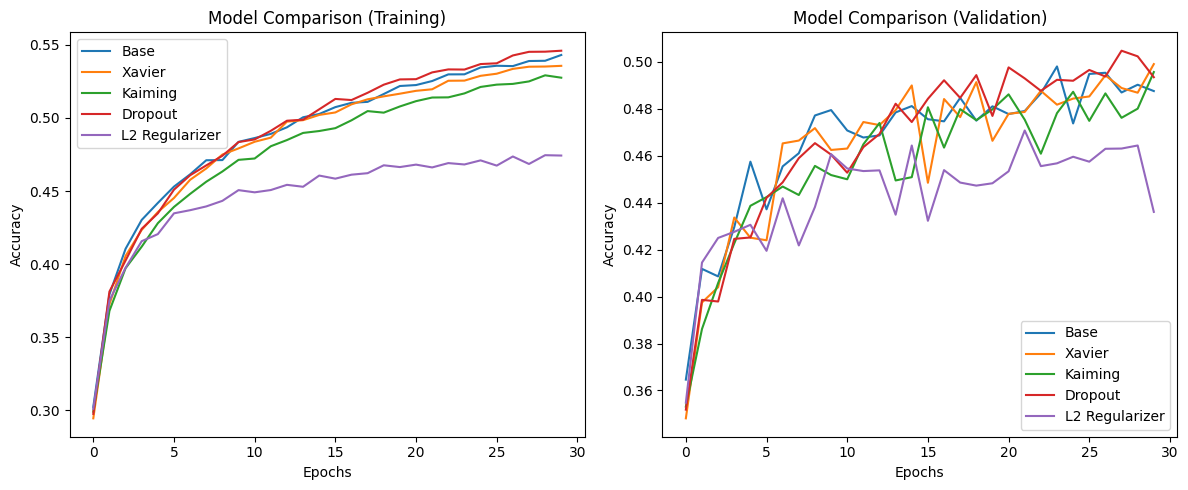

In [6]:
plt.figure(figsize=(12, 5))

# Training
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(base_model.history['accuracy'], label='Base')
plt.plot(xv_model.history['accuracy'], label='Xavier')
plt.plot(kai_model.history['accuracy'], label='Kaiming')
plt.plot(dropout_model.history['accuracy'], label='Dropout')
plt.plot(reg_model.history['accuracy'], label='L2 Regularizer')
plt.title('Model Comparison (Training)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Validation
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(base_model.history['val_accuracy'], label='Base')
plt.plot(xv_model.history['val_accuracy'], label='Xavier')
plt.plot(kai_model.history['val_accuracy'], label='Kaiming')
plt.plot(dropout_model.history['val_accuracy'], label='Dropout')
plt.plot(reg_model.history['val_accuracy'], label='L2 Regularizer')
plt.title('Model Comparison (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()